In [1]:
pip install yfinance

In [1]:
import yfinance as yf
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20,end.month,end.day)
stock = "GOOG"
google_data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [2]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-10-01,3.257789,3.343468,3.210466,3.302123,3.294034,303934969
2004-10-04,3.368624,3.408972,3.338237,3.363891,3.355650,261693228
2004-10-05,3.353929,3.450317,3.293655,3.446332,3.437889,300887589
2004-10-06,3.425909,3.448325,3.387304,3.414203,3.405839,268900140
2004-10-07,3.410218,3.483941,3.401002,3.458287,3.449815,283643194


In [3]:
google_data.shape

(5034, 6)

In [4]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,46.535787,47.025780,46.070473,46.555051,46.444761,1.142096e+08
std,44.525040,45.014691,44.087856,44.552408,44.453673,1.490217e+08
min,3.257789,3.343468,3.210466,3.302123,3.294034,1.584340e+05
25%,13.152451,13.280222,13.012849,13.139438,13.107249,2.700206e+07
50%,27.424706,27.646597,27.126773,27.420346,27.353171,5.343270e+07
75%,61.400376,62.015500,60.817337,61.432250,61.281754,1.394839e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [5]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-10-01 to 2024-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [6]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


Text(0.5, 1.0, 'Closing Price of Google data')

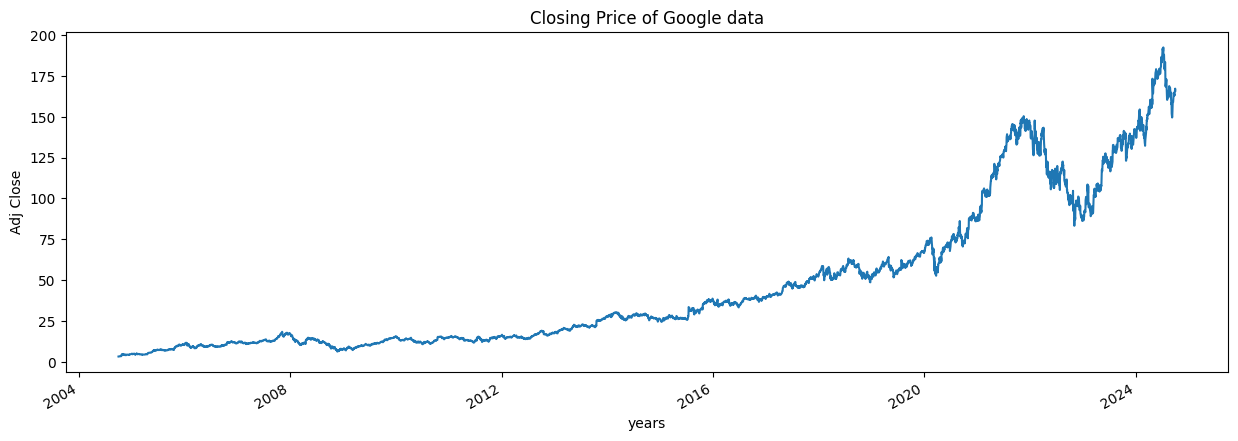

In [8]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel('years')
plt.ylabel('Adj Close')
plt.title("Closing Price of Google data")

In [9]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel('years')
    plt.ylabel('column_name')
    plt.title(f"{column_name} of Google data")

In [10]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

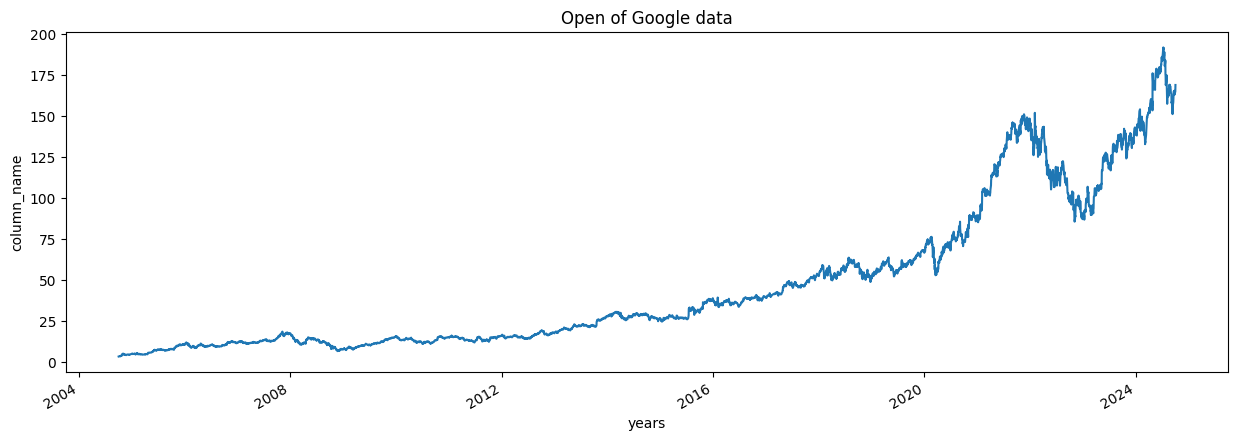

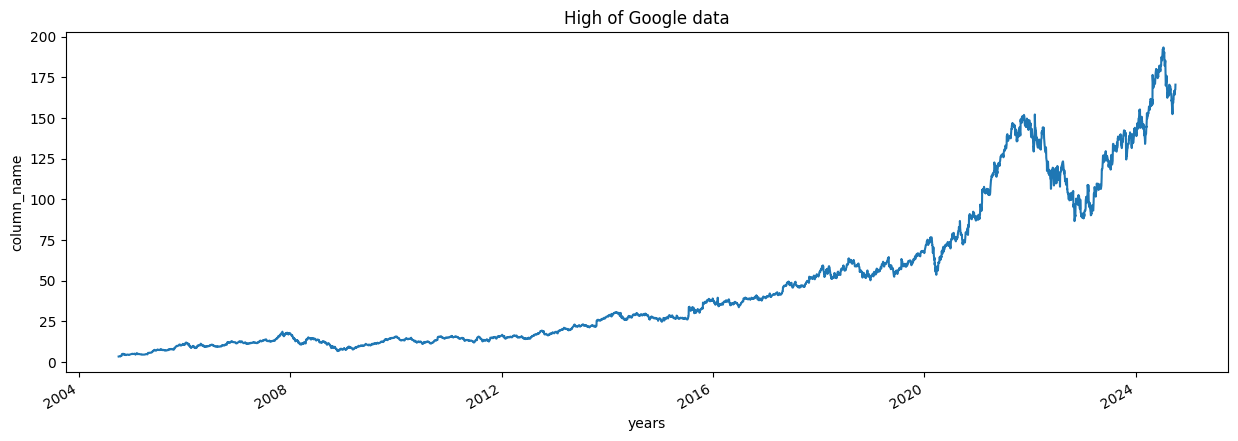

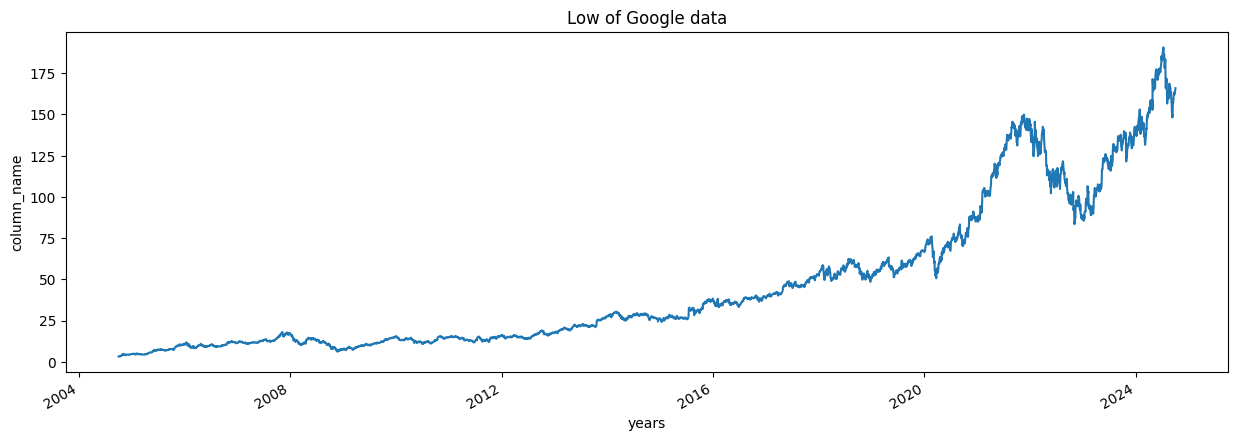

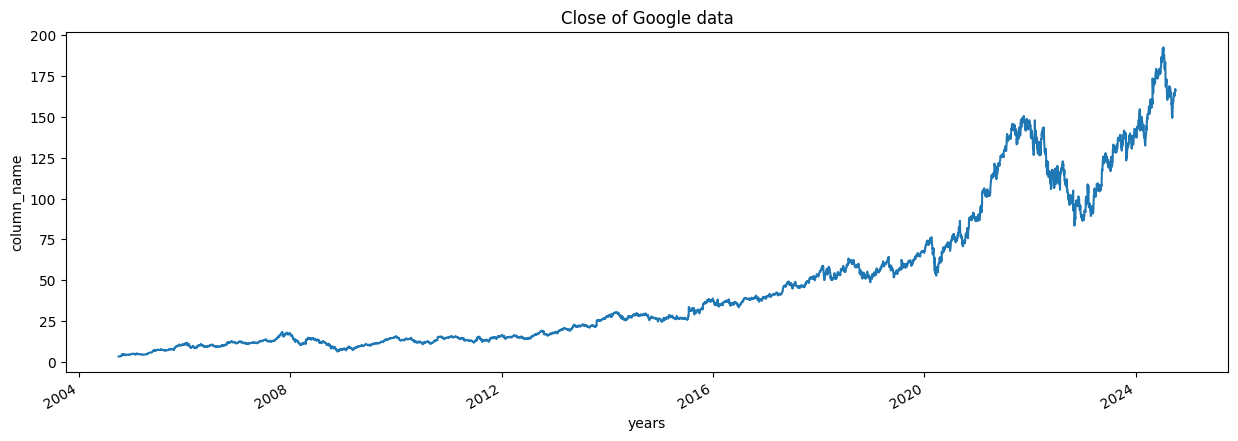

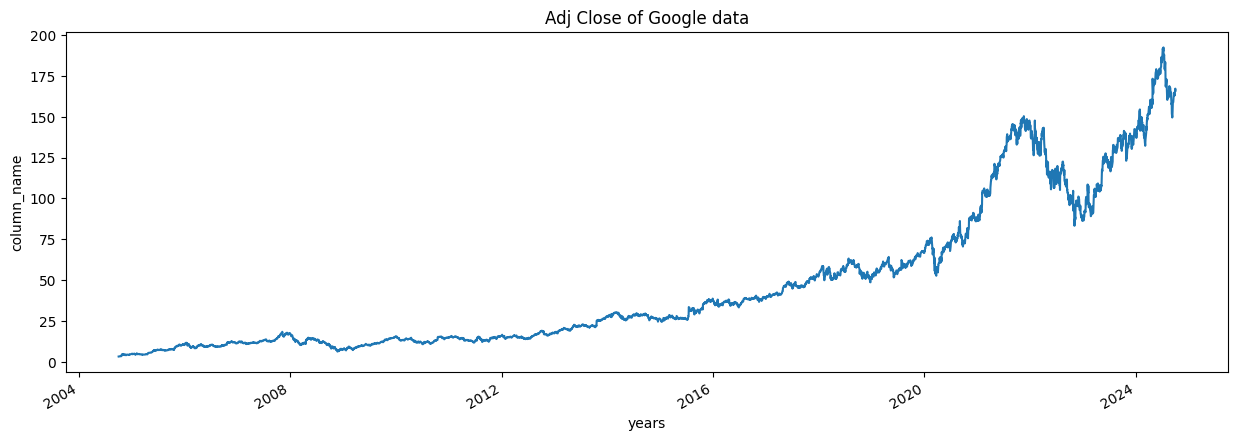

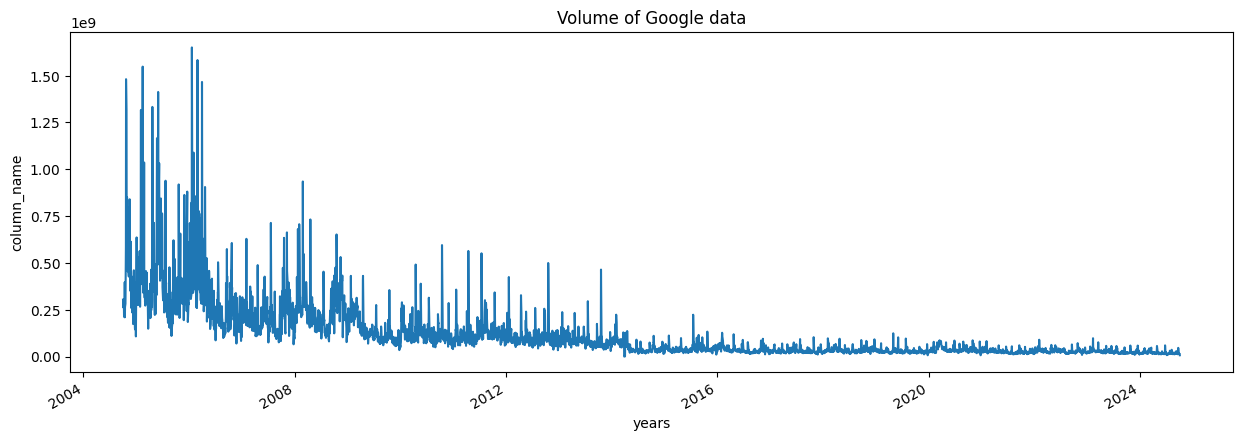

In [11]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [12]:
import pandas as pd
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100]) 
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [13]:
data.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [14]:
data = pd.DataFrame({'values': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})
data['MA'] = data['values'].rolling(5).mean()
data

,values,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [15]:
for i in range(2004,2024):
    print(i,list(google_data.index.year).count(i))

2004 64
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [18]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [21]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-09-21         NaN
2005-09-22         NaN
2005-09-23         NaN
2005-09-26         NaN
2005-09-27    5.570955
Name: MA_for_250_days, dtype: float64

<Figure size 640x480 with 0 Axes>

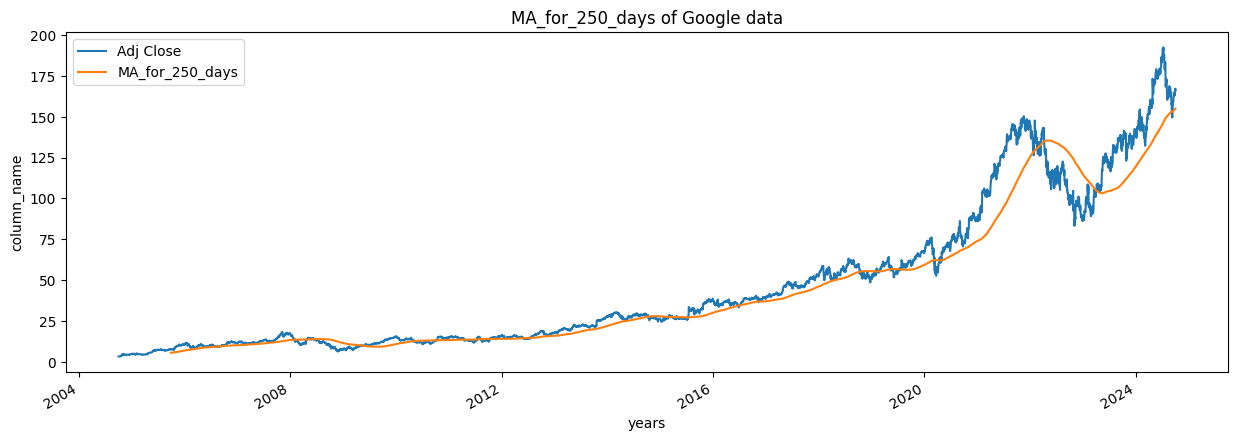

In [23]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

In [24]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(100).mean()

<Figure size 640x480 with 0 Axes>

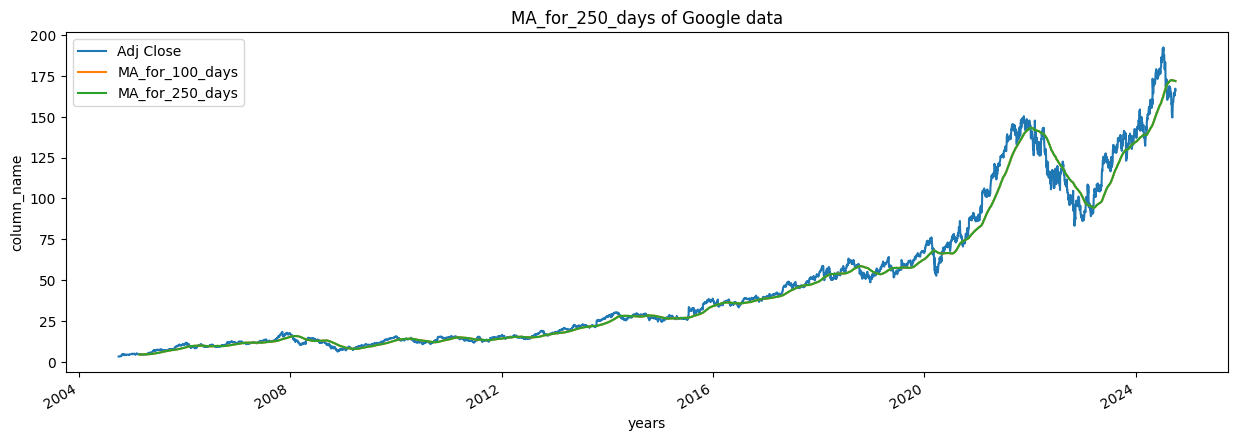

In [31]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days','MA_for_250_days']], 'MA_for_250_days')

In [26]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()


<Figure size 640x480 with 0 Axes>

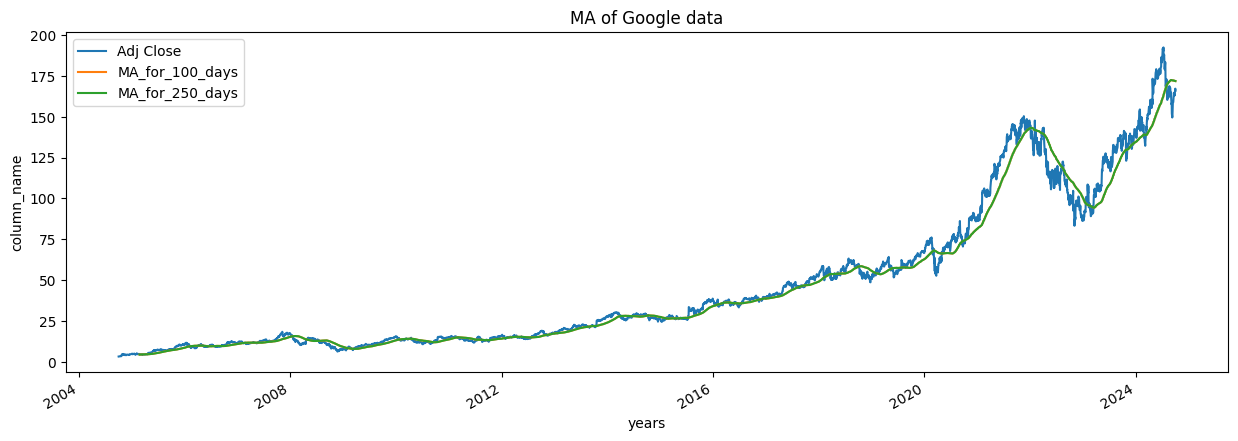

In [32]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days','MA_for_250_days']], 'MA')

<Figure size 640x480 with 0 Axes>

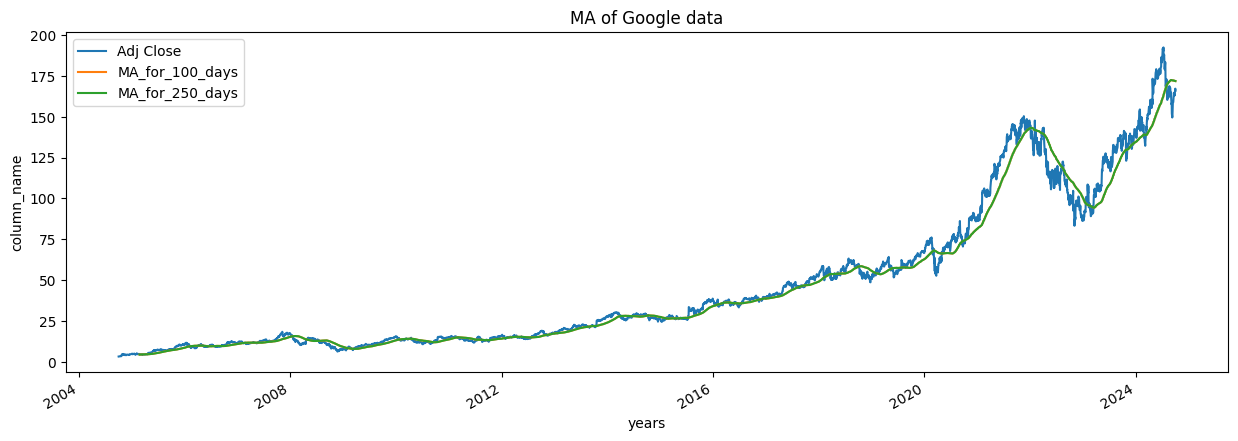

In [30]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

<Figure size 640x480 with 0 Axes>

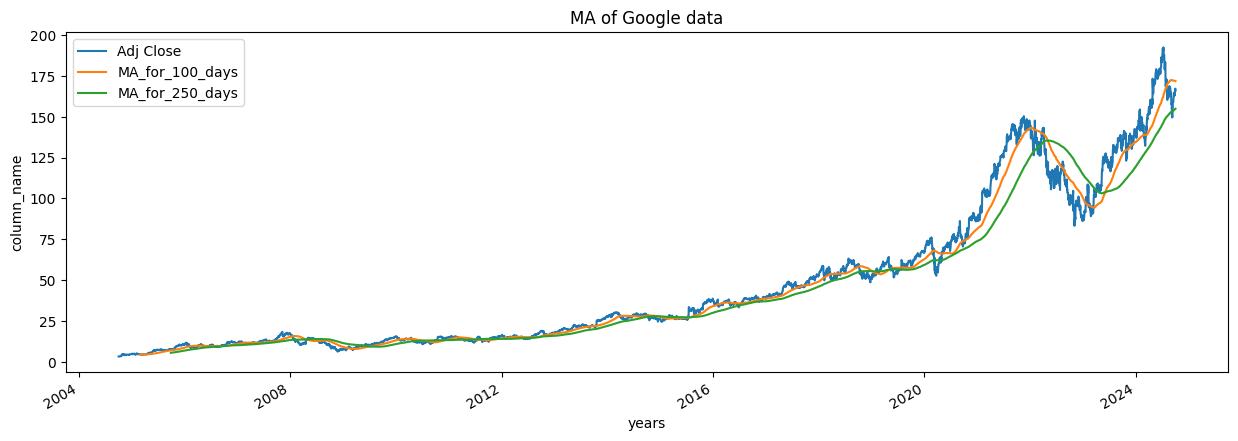

In [33]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [35]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-10-01,3.294034,NaN
2004-10-04,3.355650,0.018706
2004-10-05,3.437889,0.024508
2004-10-06,3.405839,-0.009323
2004-10-07,3.449815,0.012912


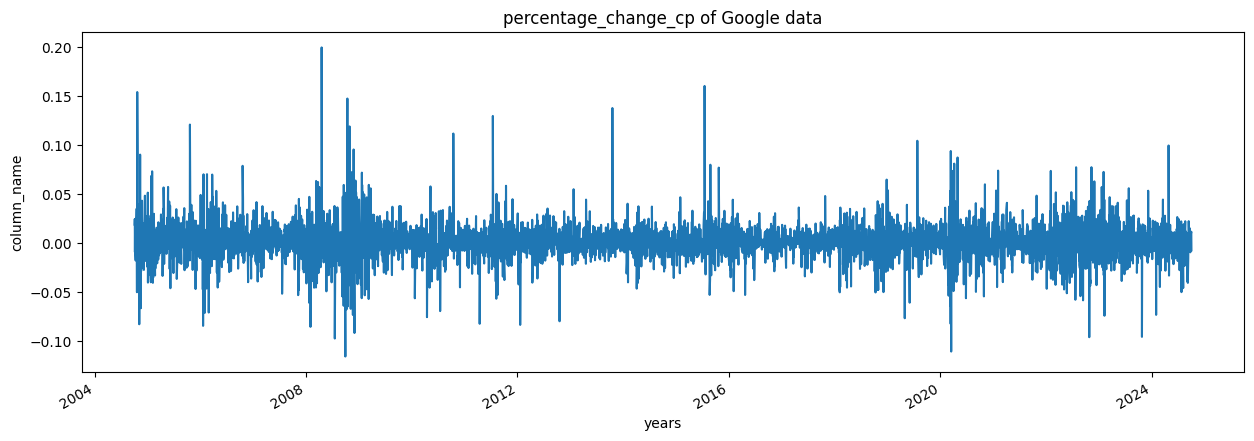

In [36]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change_cp')

In [37]:
Adj_close_price  = google_data[['Adj Close']]

In [38]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.40672302]), array([3.29403353]))

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

ModuleNotFoundError: No module named 'sklearn'

In [40]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -----------------

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00000000e+00],
       [3.25819803e-04],
       [7.60687039e-04],
       ...,
       [8.56610734e-01],
       [8.66657702e-01],
       [8.60047887e-01]])

In [42]:
len(scaled_data)

5034

In [43]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [44]:
x_data[0], y_data[0]

(array([[0.        ],
        [0.00032582],
        [0.00076069],
        [0.00059121],
        [0.00082375],
        [0.00067661],
        [0.0003521 ],
        [0.00063325],
        [0.00109308],
        [0.0012376 ],
        [0.00151481],
        [0.00217828],
        [0.002018  ],
        [0.00103921],
        [0.00220718],
        [0.00523549],
        [0.00720225],
        [0.00646652],
        [0.00701438],
        [0.00797739],
        [0.00762792],
        [0.00833606],
        [0.00818366],
        [0.00776324],
        [0.00684752],
        [0.00483084],
        [0.00525125],
        [0.00474545],
        [0.00463508],
        [0.00662681],
        [0.0064928 ],
        [0.00686986],
        [0.00524994],
        [0.00524469],
        [0.00459304],
        [0.00483741],
        [0.00427248],
        [0.00459042],
        [0.00554161],
        [0.0061499 ],
        [0.00636799],
        [0.00649017],
        [0.00622479],
        [0.00615121],
        [0.00628259],
        [0

In [45]:
int(len(x_data)*0.7)

3453

In [47]:
5034 - 100 - int(len(x_data)*0.7)

1481

In [48]:
splitting_len = int(len(x_data)*0.7)
x_train  = x_data[:splitting_len]
y_train  = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [50]:
from keras.models import Sequential
from keras.layers import Dense,LSTM



In [53]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
model.fit(x_train,y_train,batch_size=1, epochs=2)

Epoch 1/2
3453/3453 [==============================] - 257s 72ms/step - loss: 1.2019e-04
Epoch 2/2
3453/3453 [==============================] - 215s 62ms/step - loss: 5.6971e-05


In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 128)          66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 25)                1625      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
predictions = model.predict(x_test)

47/47 [==============================] - 5s 57ms/step


In [58]:
predictions


array([[0.2785696 ],
       [0.27668646],
       [0.27101943],
       ...,
       [0.8804781 ],
       [0.8865542 ],
       [0.896122  ]], dtype=float32)

In [59]:
inverse_predictions = scaler.inverse_transform(predictions)
inverse_predictions

array([[ 55.97508 ],
       [ 55.618954],
       [ 54.547245],
       ...,
       [169.80362 ],
       [170.95268 ],
       [172.76207 ]], dtype=float32)

In [60]:
y_test

array([[0.26377327],
       [0.256515  ],
       [0.25583458],
       ...,
       [0.85661073],
       [0.8666577 ],
       [0.86004789]])

In [61]:
inverse_y_test = scaler.inverse_transform(y_test)
inverse_y_test

array([[ 53.17690659],
       [ 51.80427551],
       [ 51.67559814],
       ...,
       [165.28999329],
       [167.19000244],
       [165.94000244]])

In [62]:
rmse = np.sqrt(np.mean( (inverse_predictions - inverse_y_test)**2))

In [63]:
rmse

5.260415663142793

In [64]:
plotting_data = pd.DataFrame(
    {
    'Original_test_data':inverse_y_test.reshape(-1),
        'predictions': inverse_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,Original_test_data,predictions
Date,,
2018-11-09,53.176907,55.975079
2018-11-12,51.804276,55.618954
2018-11-13,51.675598,54.547245
2018-11-14,52.055161,53.806110
2018-11-15,53.105083,53.725906


<Figure size 640x480 with 0 Axes>

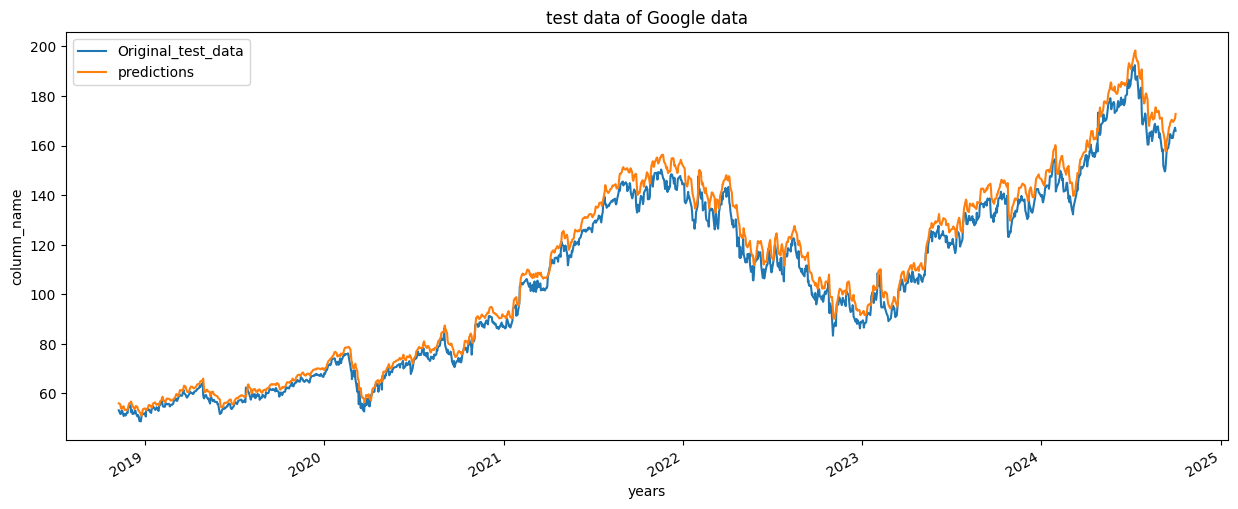

In [65]:
plot_graph((15,6), plotting_data, 'test data')

<Figure size 640x480 with 0 Axes>

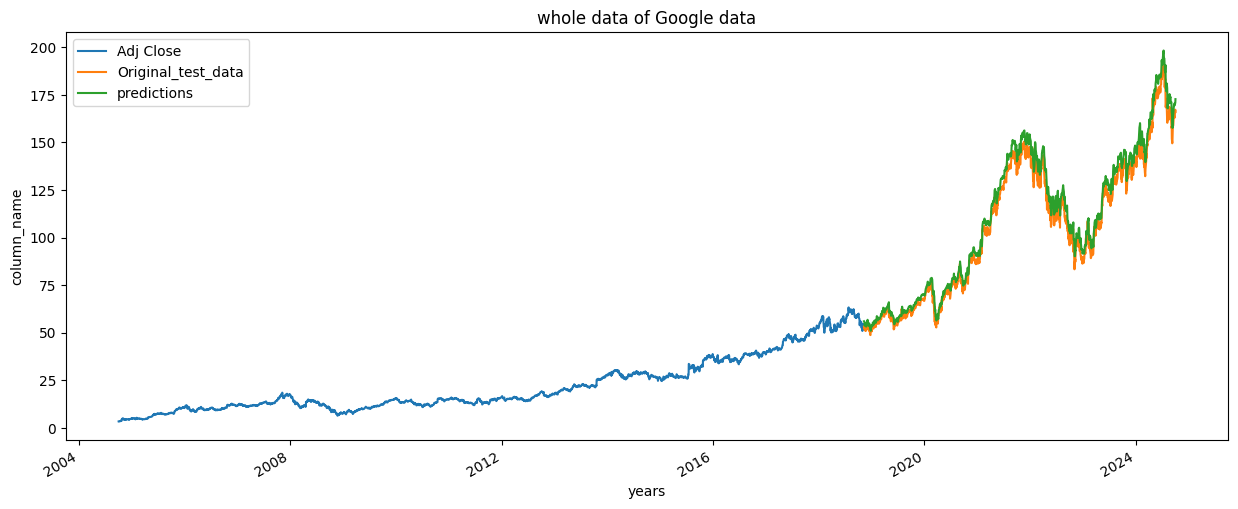

In [67]:
plot_graph((15,6), pd.concat([ Adj_close_price[:splitting_len+100],plotting_data], axis=0), 'whole data')

In [70]:
model.save("latest_stock_price_model.keras")